In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [2]:
path = '/mnt/home/polymathic/ceph/the_well/3D/stefan_data/data/RT_Data2/At25/mean0001.0/StanDiv0000.5/Density.h5'

In [11]:
with h5py.File(path, 'r') as f:
    density = f['Density'][:]

In [14]:
density.shape

(1, 61, 128, 128, 128)

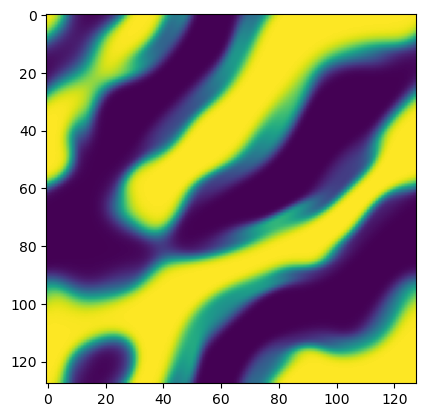

In [16]:
time = 10
slice_nb = 64
plt.imshow(density[0, time, slice_nb, :, :])

In [32]:
import os
import glob
import re
import imageio
import shutil
def create_gif(time_series, saving_directory, name_file="density", delete_imgs=True):
    time_series_min = time_series.min()
    time_series_max = time_series.max()
    if time_series.ndim > 3:
        print("Error: The time series should be (time, height, width)")
        return
    if not os.path.exists(saving_directory + "/img_for_gif"):
        os.makedirs(saving_directory + "/img_for_gif")
    for i in range(time_series.shape[0]):
        plt.imshow(
            time_series[i], origin="lower", vmin=time_series_min, vmax=time_series_max
        )
        plt.axis("off")
        plt.savefig(
            saving_directory + f"/img_for_gif/time_series_{i}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        plt.close()
    images = []
    for file_name in sorted(
        glob.glob(saving_directory + "/img_for_gif/*.png"),
        key=lambda x: int(re.findall(r"\d+", x)[1]),
    ):
        images.append(imageio.imread(file_name))
    imageio.mimsave(saving_directory + "/" + name_file + ".gif", images, duration=0.1)
    if delete_imgs:
        shutil.rmtree(saving_directory + "/img_for_gif")

In [33]:
density[0,:,64,:,:].shape

(61, 128, 128)

In [34]:
create_gif(density[0,:,64,:,:], "/mnt/home/polymathic/ceph/the_well/3D/stefan_data/")

/tmp/ipykernel_1079382/4292166208.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_name))
